# Exploratory Data Analysis for banking dashboard

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
banking = pd.read_csv("banking-clients.csv")
banking_relationship = pd.read_csv("banking-realtionships.csv")
gender = pd.read_csv("gender.csv")
investment_advisor = pd.read_csv("investment-advisiors.csv")

In [3]:
final_df = (banking
            .merge(banking_relationship, on="BRId", how="inner")
            .merge(gender, on="GenderId", how="inner")
            .merge(investment_advisor, on="IAId", how="inner"))

In [4]:
pd.set_option("display.max_columns", None)

In [5]:
final_df.head()

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId,Banking Relationship,Gender,Investment Advisor
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,75384.77,17677.95,1,484.54,776242.92,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Retail,Male,Victor Dean
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.31,17398.92,1,2256.88,1270615.43,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Institutional,Male,Jeremy Porter
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,169935.23,42825.90,2,4568.74,1052715.84,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Private Bank,Female,Ernest Knight
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,356808.11,5473.15,2,4205.00,121195.06,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,Commercial,Male,Eric Shaw
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.68,48077.60,1,3779.49,1048301.95,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Retail,Female,Kevin Kim


In [6]:
final_df.shape

(3000, 28)

In [7]:
final_df.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Banking Relationship',
       'Gender', 'Investment Advisor'],
      dtype='object')

In [8]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [9]:
final_df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [10]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Medium', 'High']

final_df['Income_Band'] = pd.cut(final_df['Estimated Income'], bins = bins, labels = labels, right = False)

In [11]:
bins = [17, 30, 50, 70, float('inf')]
labels = ['17-30', '30-50', '50-70', '70+']

final_df['Age Group'] = pd.cut(final_df['Age'], bins=bins, labels=labels, right=False)

In [12]:
final_df = final_df.drop(columns=['Location ID', 'BRId', 'GenderId', 'IAId'])

In [13]:
final_df.columns = final_df.columns.str.strip().str.replace(' ', '_').str.lower()

## Univariate Analysis

In [14]:
final_df.columns

Index(['client_id', 'name', 'age', 'joined_bank', 'banking_contact',
       'nationality', 'occupation', 'fee_structure', 'loyalty_classification',
       'estimated_income', 'superannuation_savings', 'amount_of_credit_cards',
       'credit_card_balance', 'bank_loans', 'bank_deposits',
       'checking_accounts', 'saving_accounts', 'foreign_currency_account',
       'business_lending', 'properties_owned', 'risk_weighting',
       'banking_relationship', 'gender', 'investment_advisor', 'income_band',
       'age_group'],
      dtype='object')

In [15]:
numerical_cols = final_df[['estimated_income', 'superannuation_savings',
                           'credit_card_balance', 'bank_loans', 'bank_deposits',
                           'checking_accounts', 'saving_accounts',
                           'foreign_currency_account', 'business_lending']]

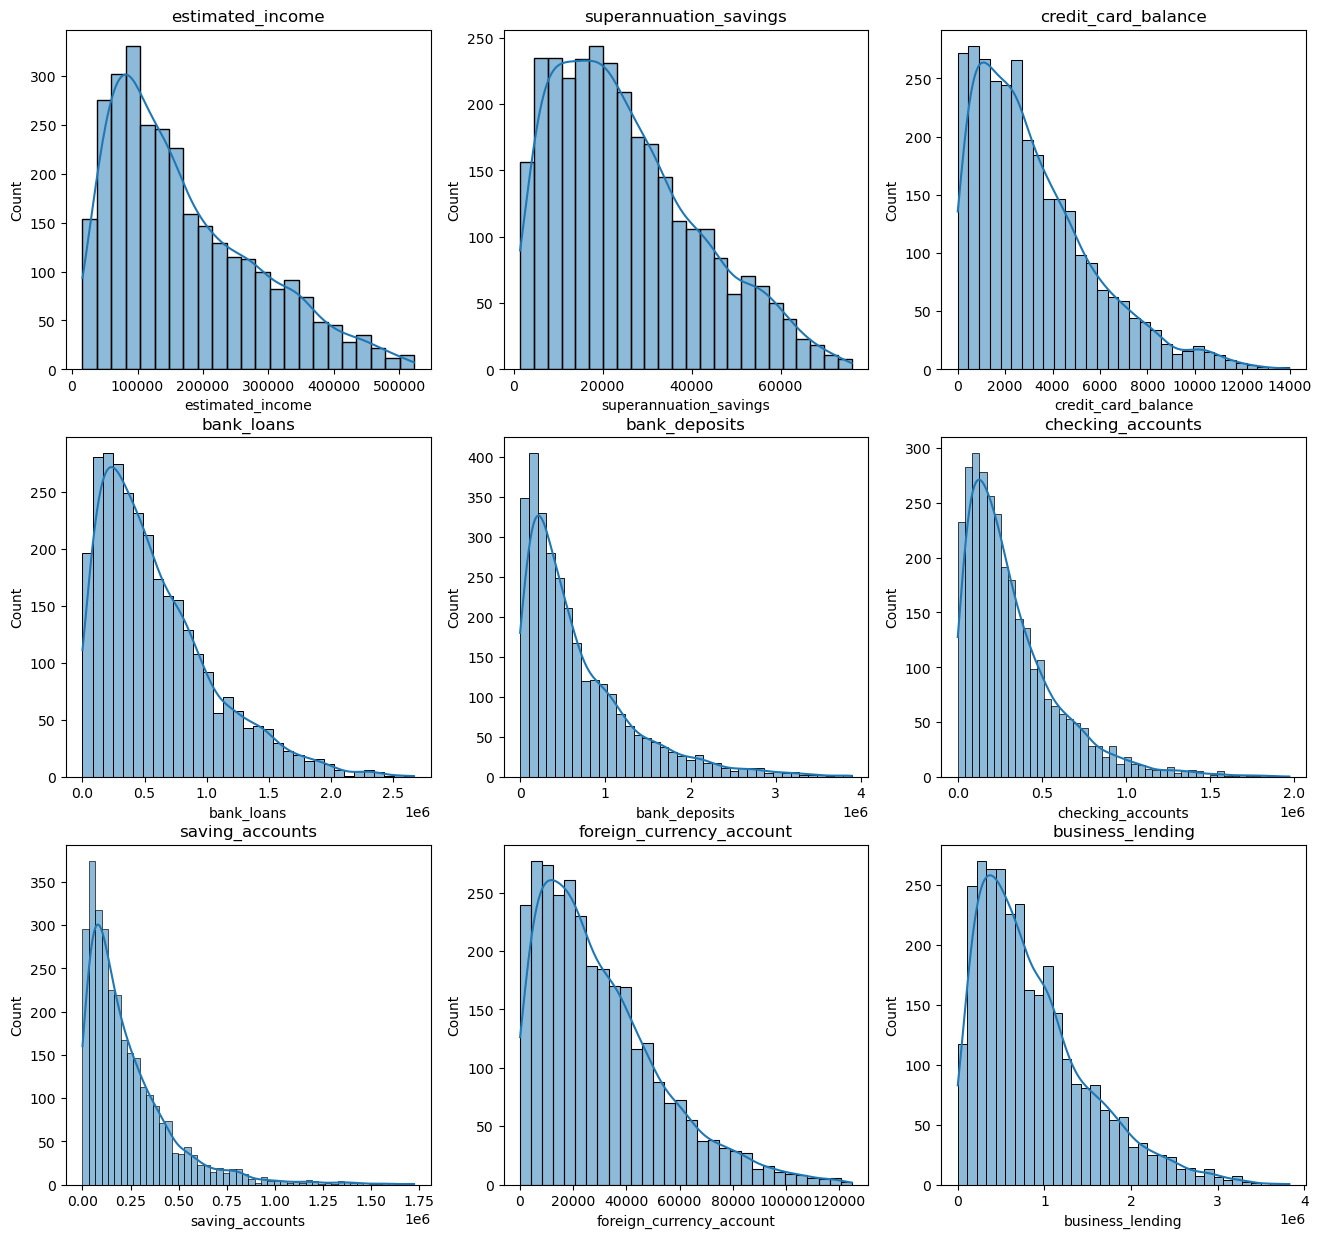

In [21]:
plt.figure(figsize=(16,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(final_df[col], kde=True)
    plt.title(col)
plt.show()

In [22]:
categorical_cols = final_df[['age_group', 'fee_structure', "nationality",
                             'banking_relationship', 'loyalty_classification',
                             'income_band', 'gender']]

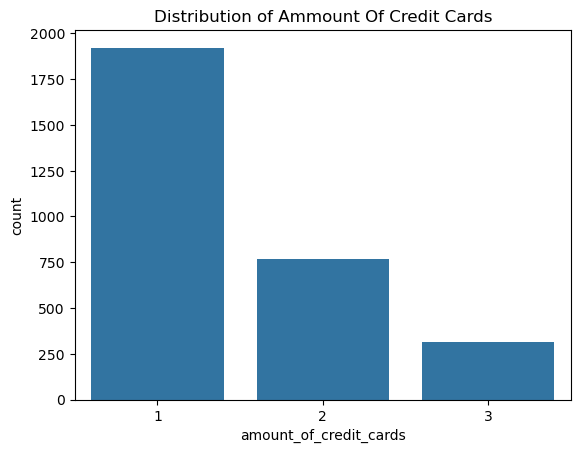

In [23]:
sns.countplot(data=final_df, x='amount_of_credit_cards')
plt.title('Distribution of Ammount Of Credit Cards')
plt.show()

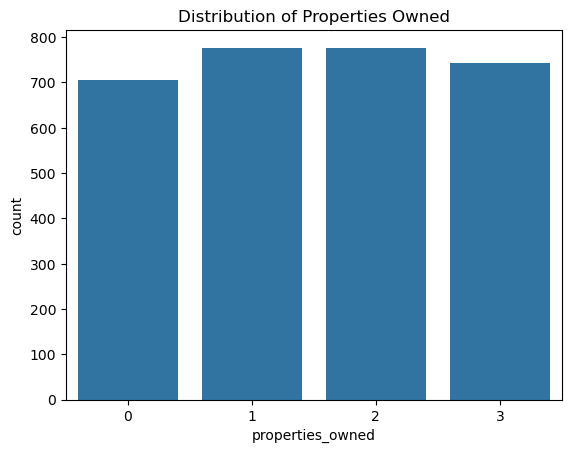

In [32]:
sns.countplot(data=final_df, x='properties_owned')
plt.title('Distribution of Properties Owned')
plt.show()

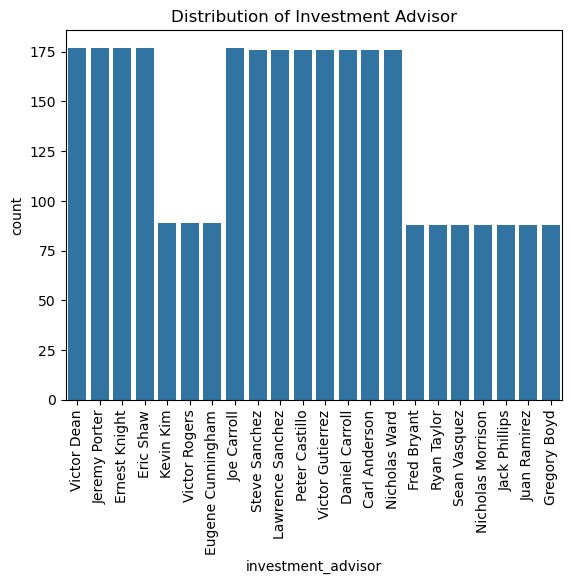

In [25]:
sns.countplot(data=final_df, x='investment_advisor')
plt.title('Distribution of Investment Advisor')
plt.xticks(rotation=90)
plt.show()

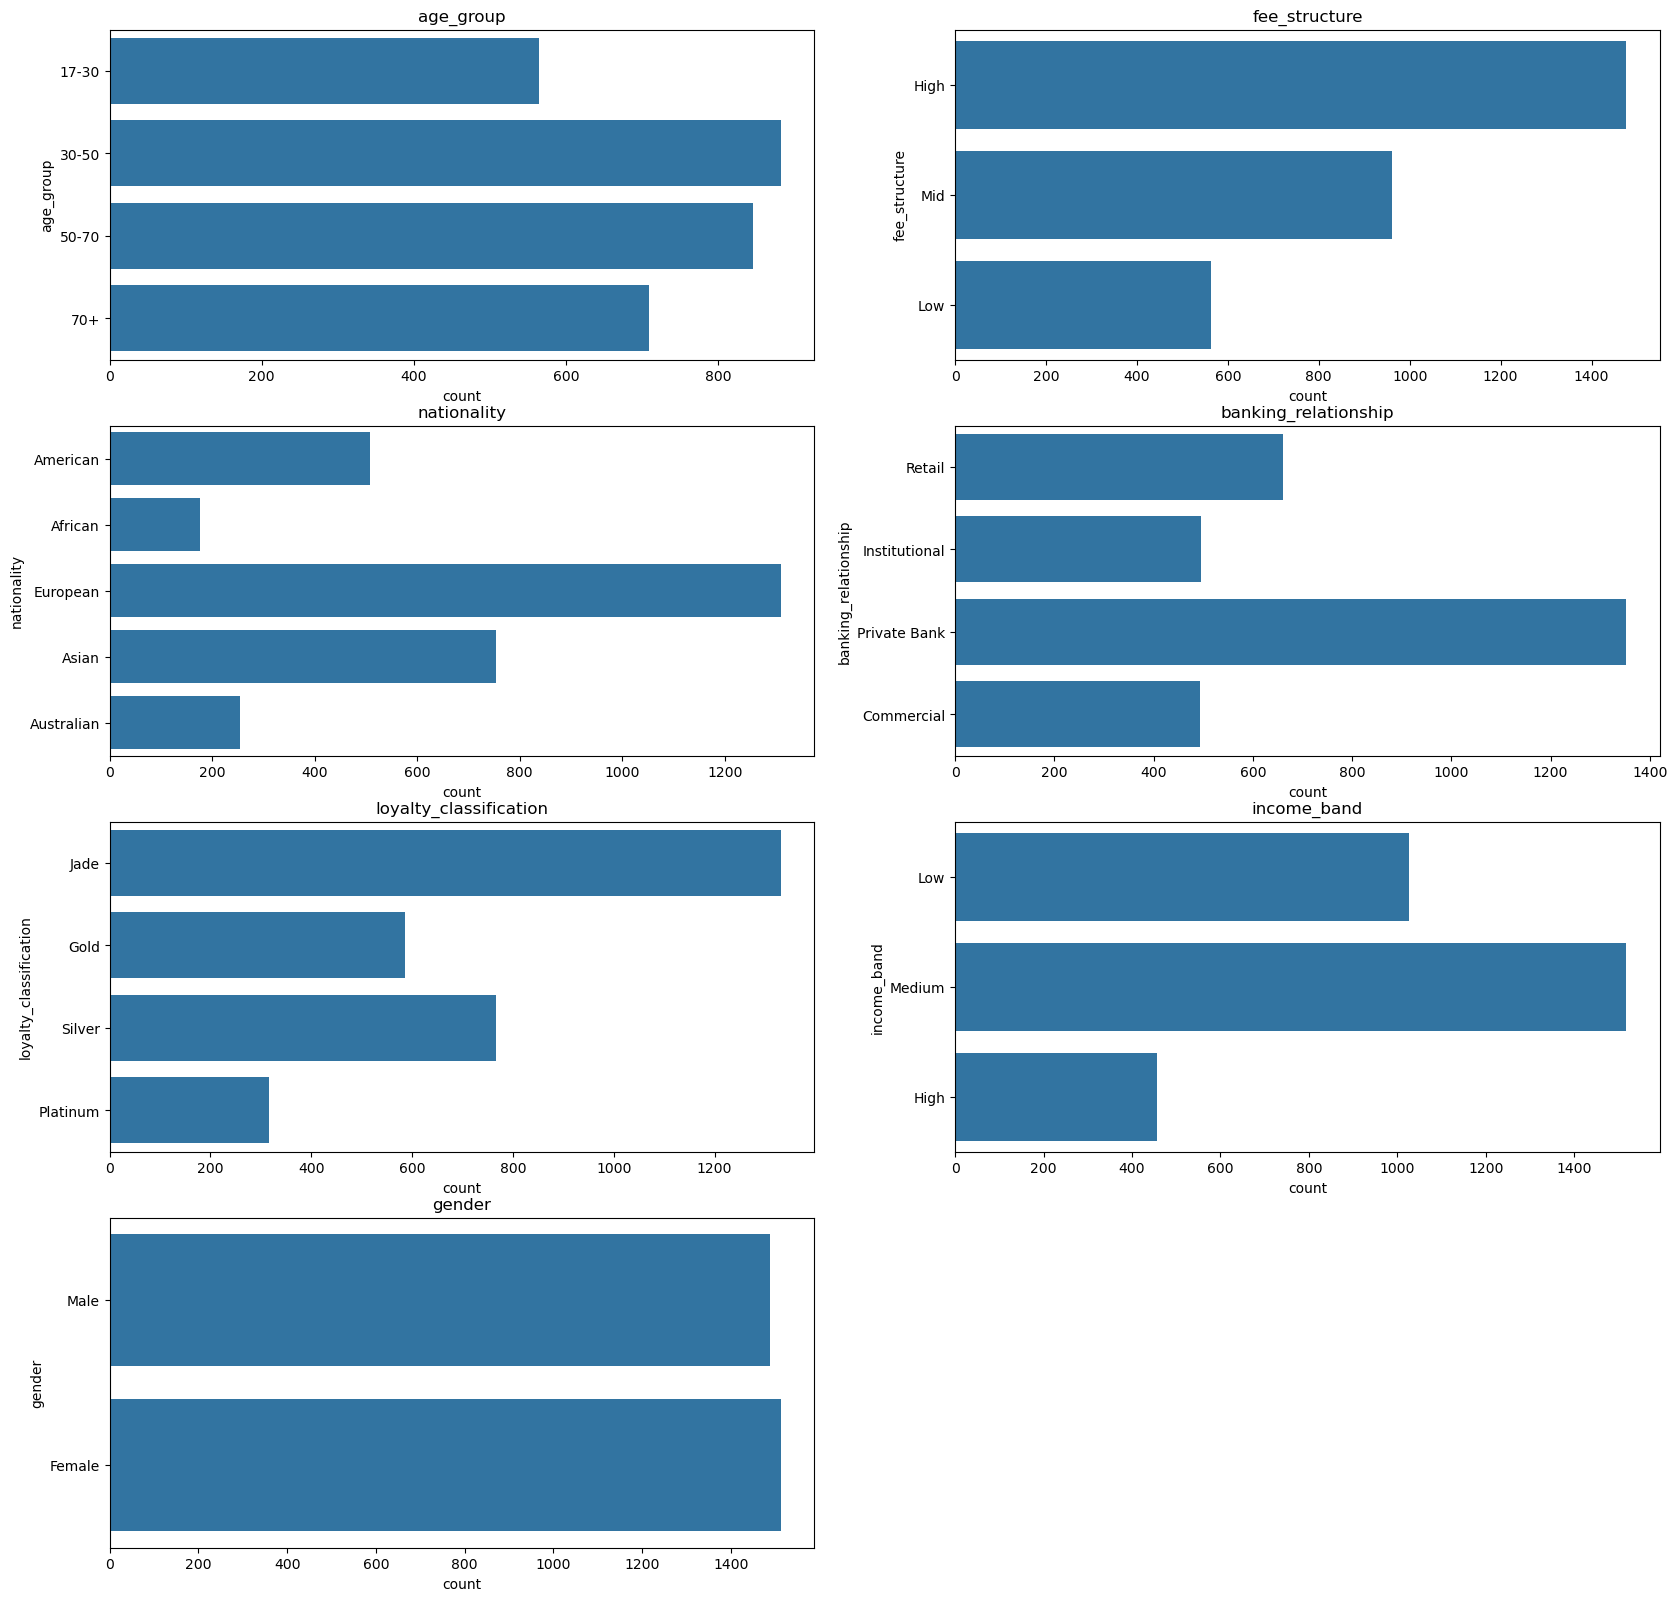

In [26]:
plt.figure(figsize=(20,30))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 2, i+1)
    sns.countplot(final_df[col])
    plt.title(col)
plt.show()

## Bivariate Analysis

In [27]:
final_df.columns

Index(['client_id', 'name', 'age', 'joined_bank', 'banking_contact',
       'nationality', 'occupation', 'fee_structure', 'loyalty_classification',
       'estimated_income', 'superannuation_savings', 'amount_of_credit_cards',
       'credit_card_balance', 'bank_loans', 'bank_deposits',
       'checking_accounts', 'saving_accounts', 'foreign_currency_account',
       'business_lending', 'properties_owned', 'risk_weighting',
       'banking_relationship', 'gender', 'investment_advisor', 'income_band',
       'age_group'],
      dtype='object')

In [29]:
numerical_cols.columns

Index(['estimated_income', 'superannuation_savings', 'credit_card_balance',
       'bank_loans', 'bank_deposits', 'checking_accounts', 'saving_accounts',
       'foreign_currency_account', 'business_lending'],
      dtype='object')

In [30]:
categorical_cols.columns

Index(['age_group', 'fee_structure', 'nationality', 'banking_relationship',
       'loyalty_classification', 'income_band', 'gender'],
      dtype='object')

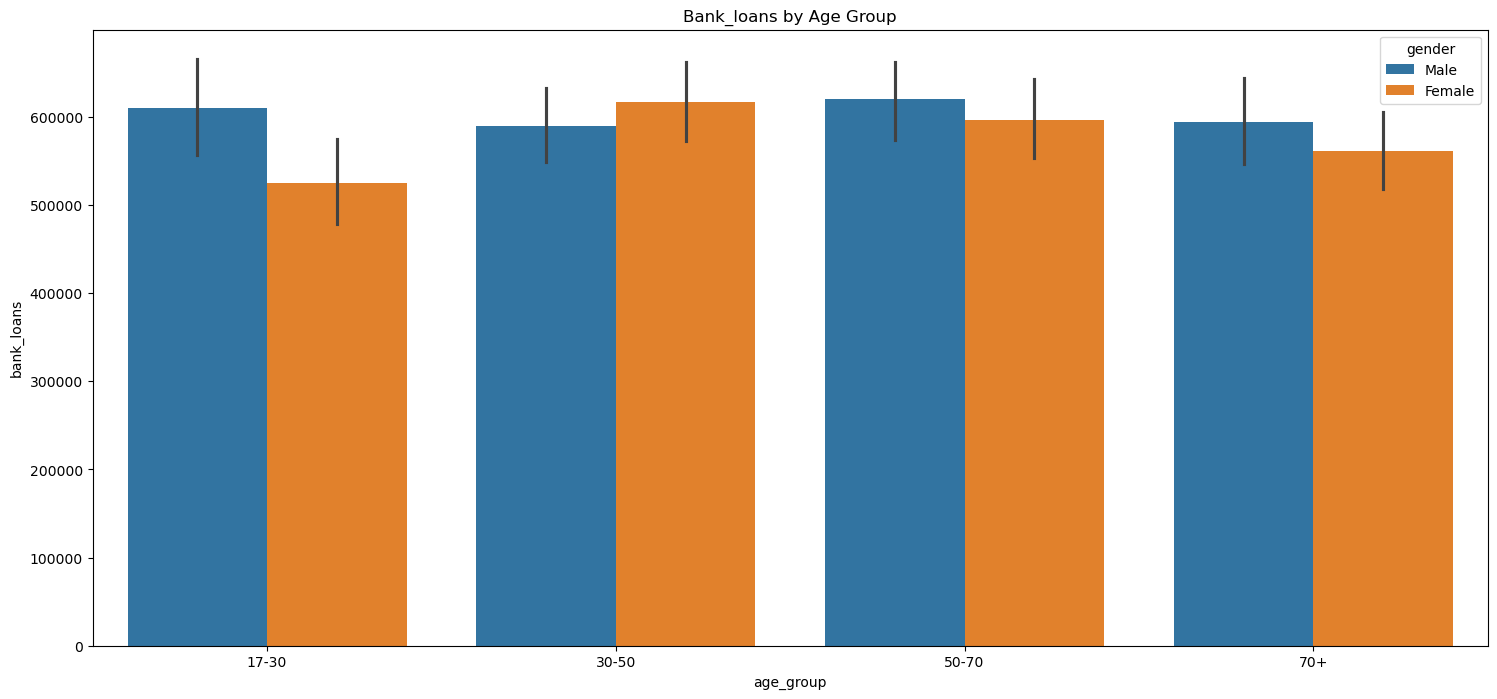

In [39]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='age_group', y='bank_loans', hue='gender')
plt.title('Bank_loans by Age Group')
plt.show()

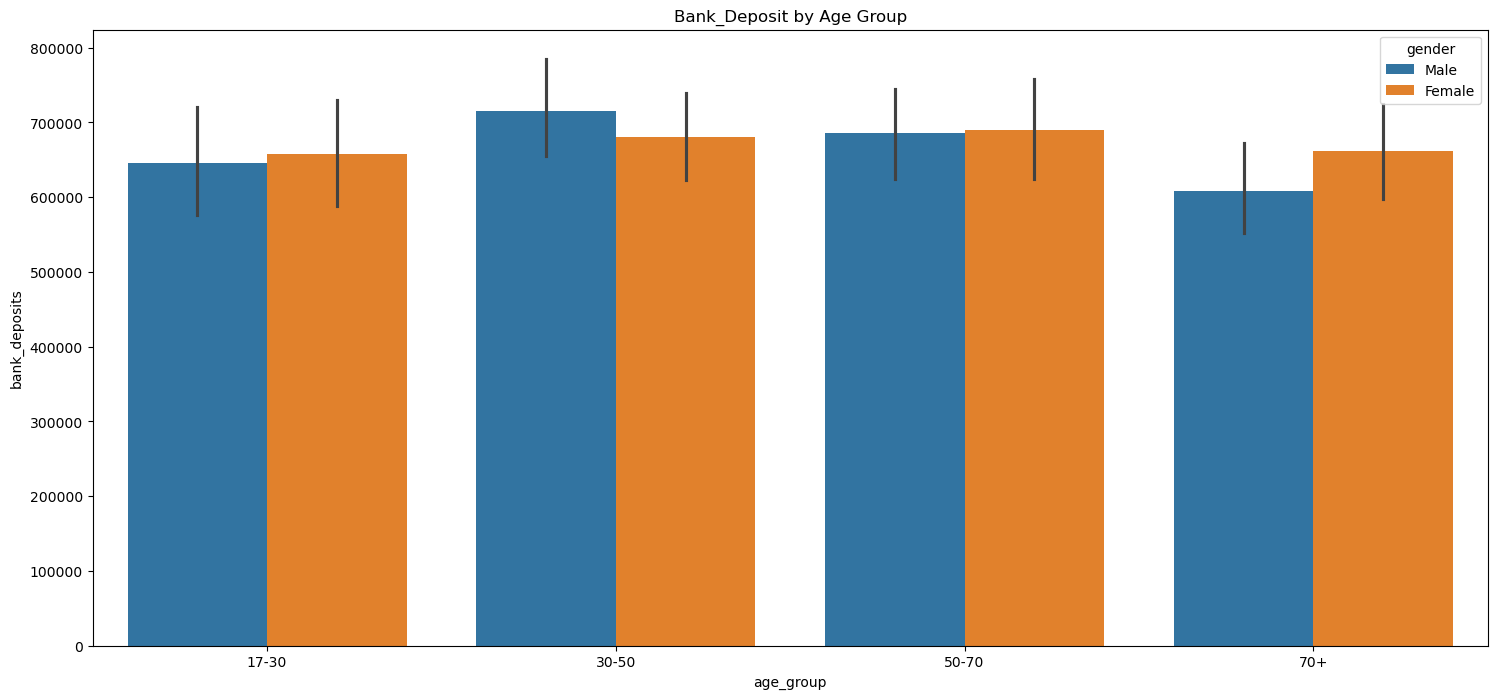

In [41]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='age_group', y='bank_deposits', hue='gender')
plt.title('Bank_Deposit by Age Group')
plt.show()

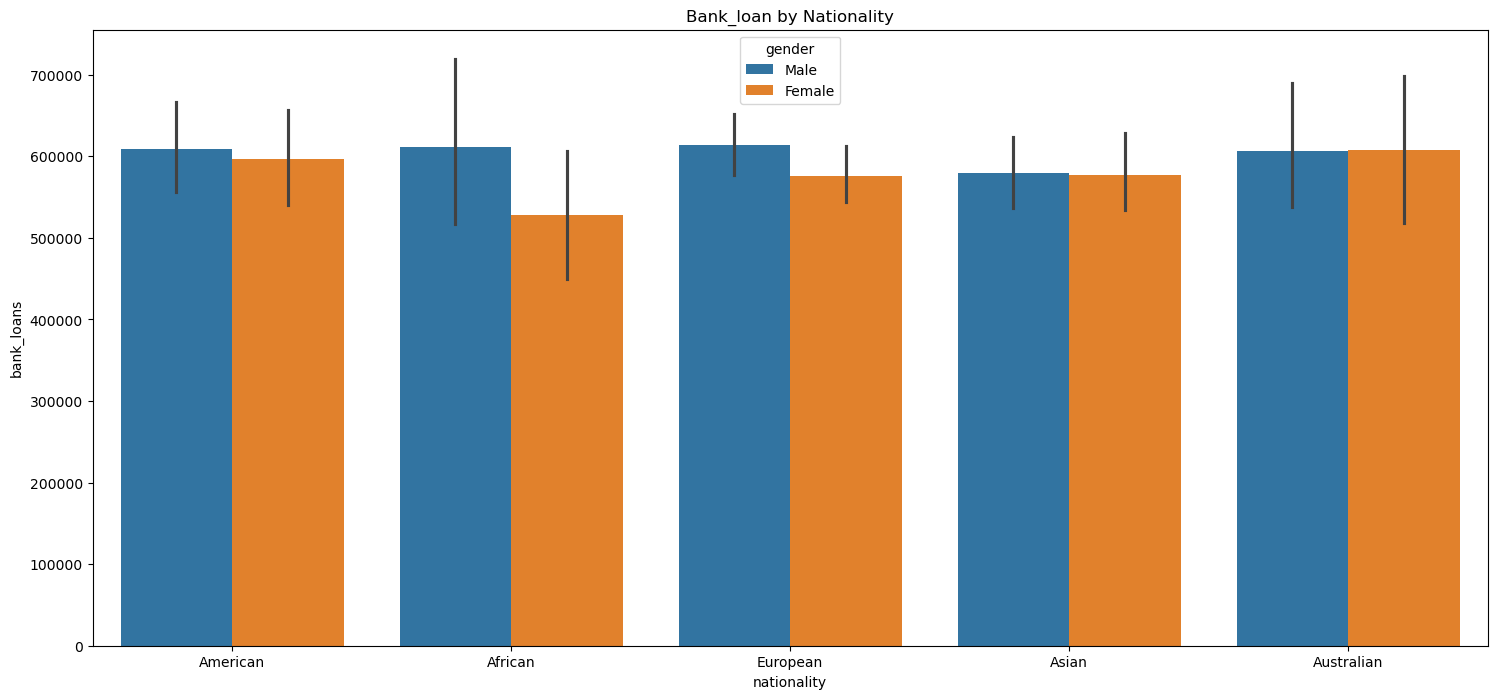

In [54]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='nationality', y='bank_loans', hue='gender')
plt.title('Bank_loan by Nationality')
plt.show()

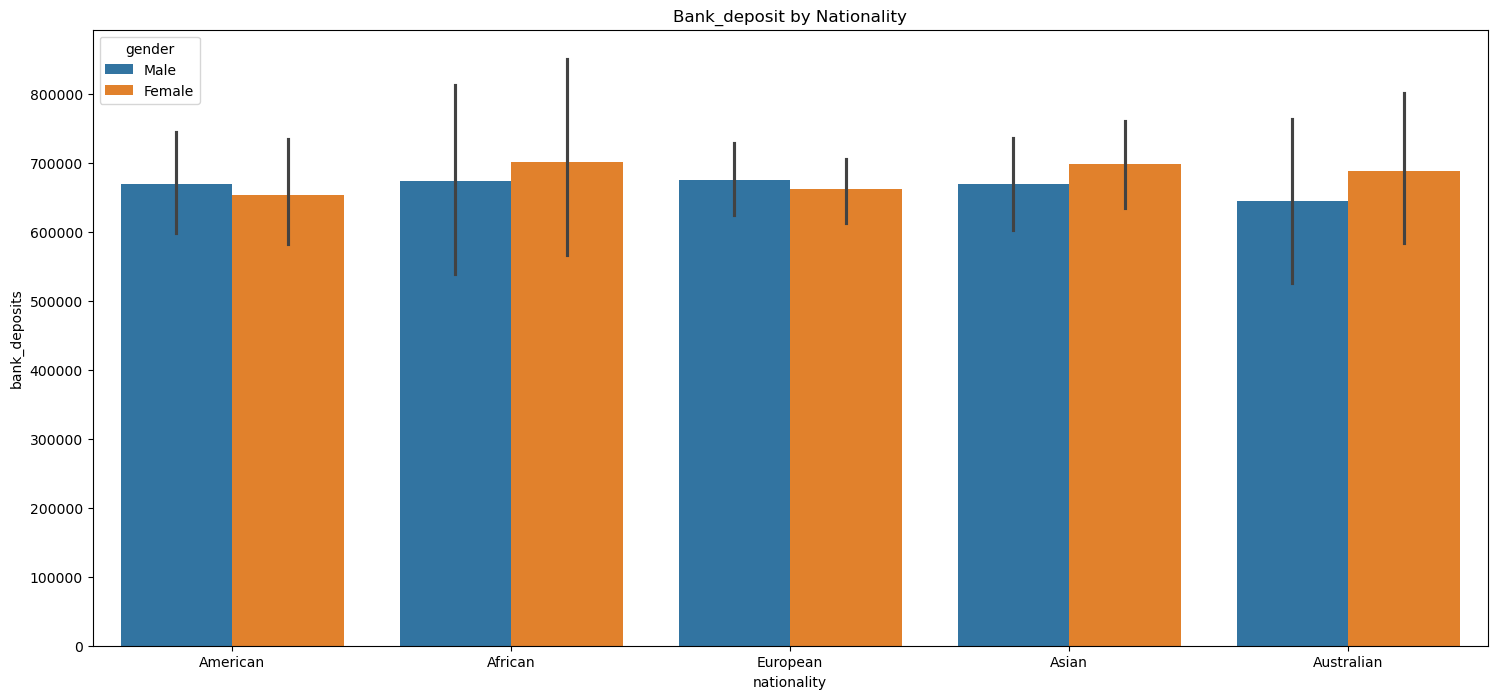

In [53]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='nationality', y='bank_deposits', hue='gender')
plt.title('Bank_deposit by Nationality')
plt.show()

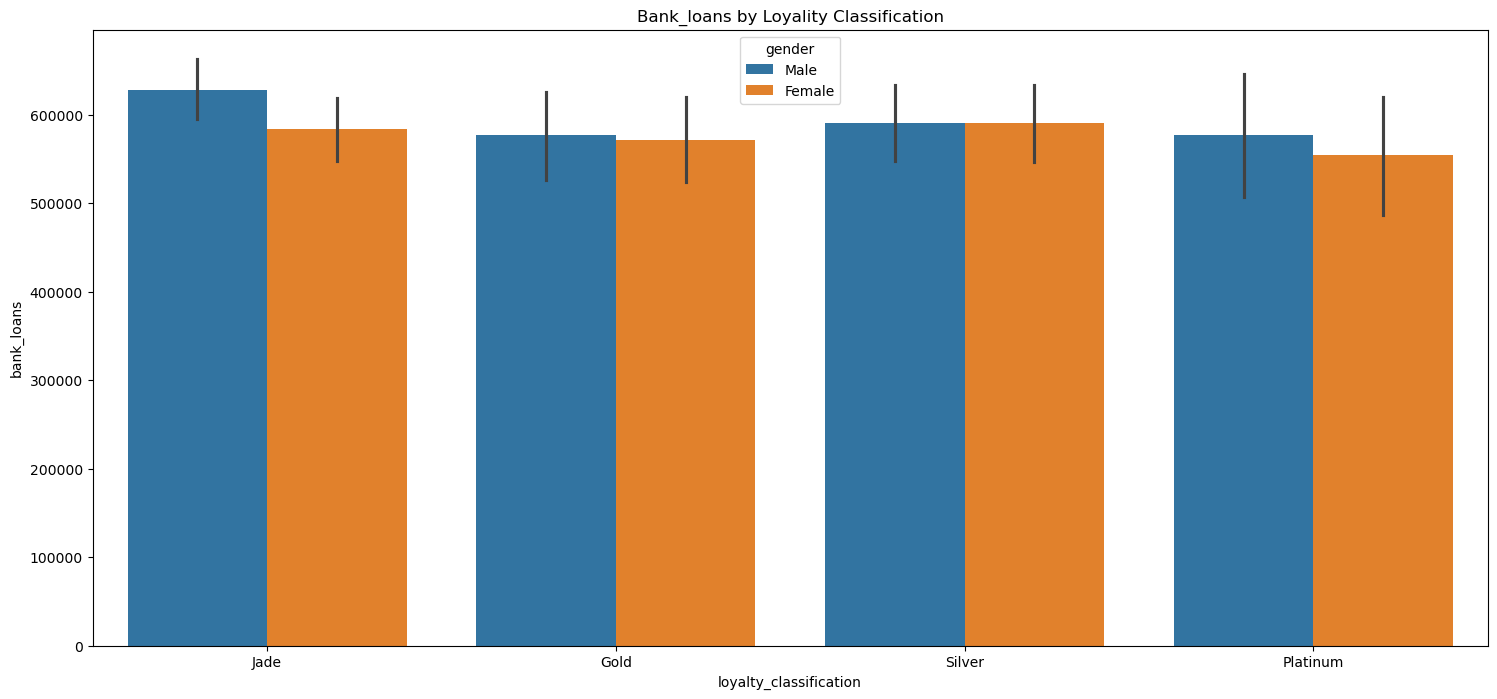

In [46]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='loyalty_classification', y='bank_loans', hue='gender')
plt.title('Bank_loans by Loyality Classification')
plt.show()

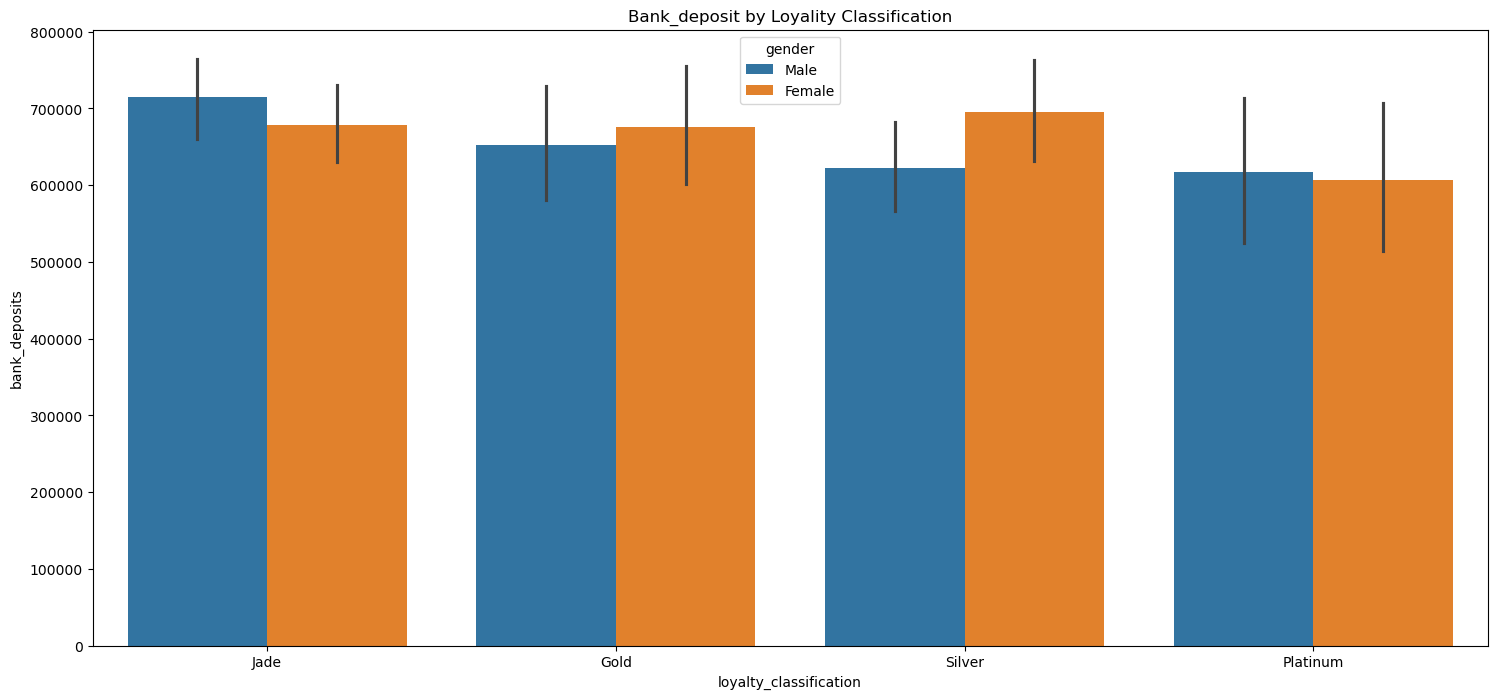

In [52]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='loyalty_classification', y='bank_deposits', hue='gender')
plt.title('Bank_deposit by Loyality Classification')
plt.show()

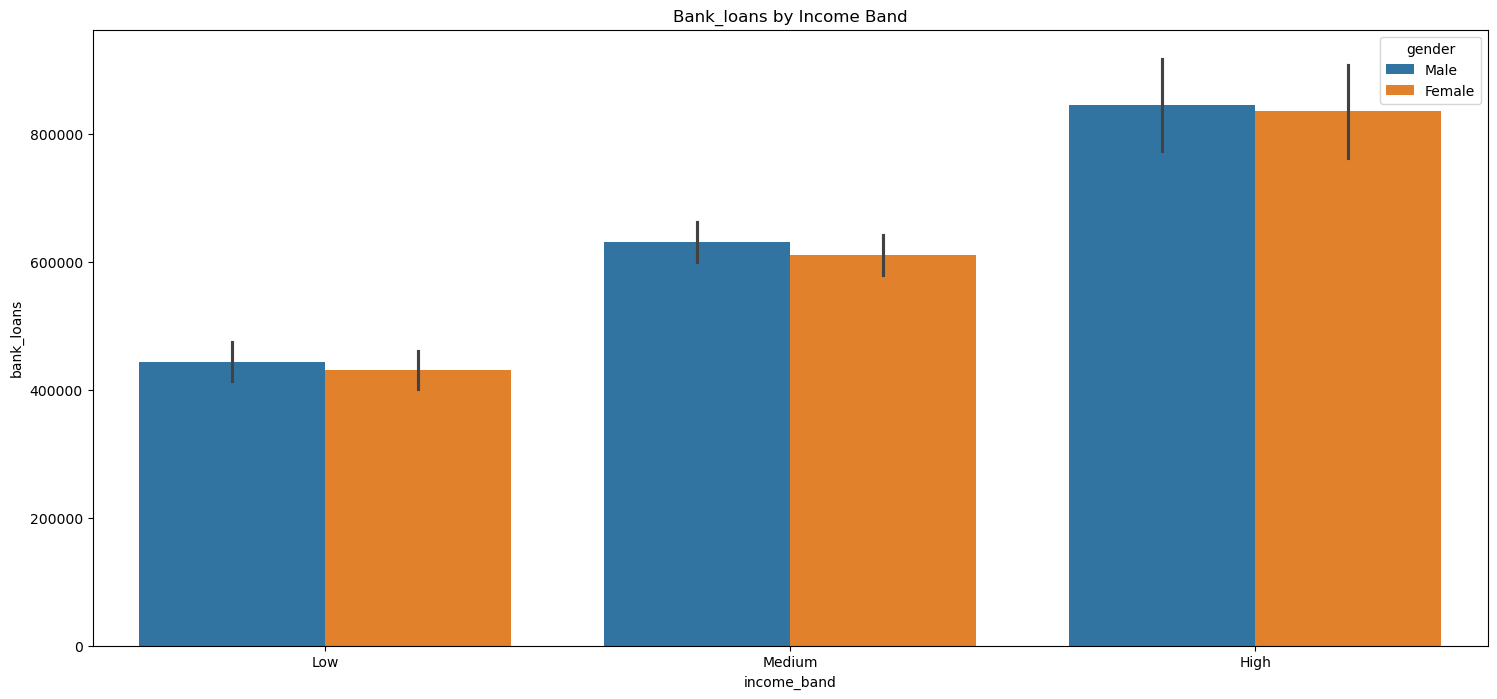

In [50]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='income_band', y='bank_loans', hue='gender')
plt.title('Bank_loans by Income Band')
plt.show()

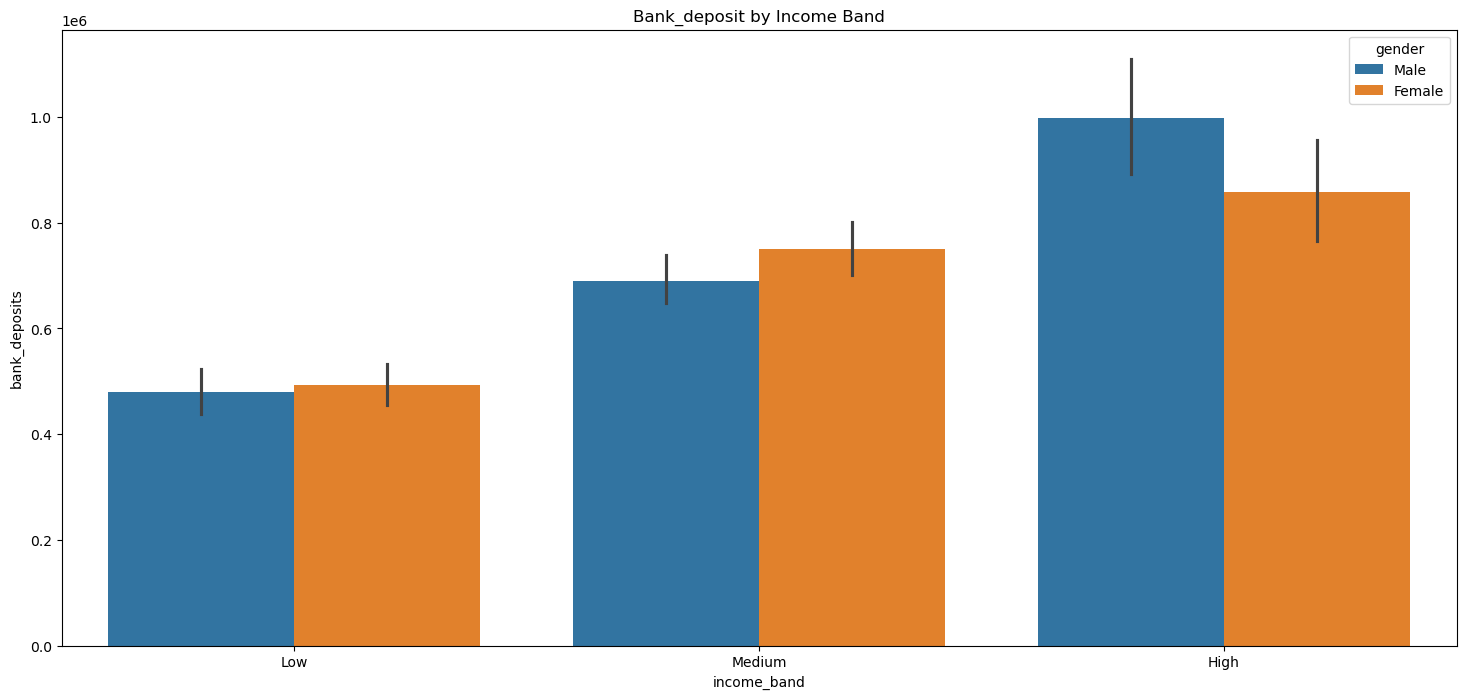

In [51]:
plt.figure(figsize=(18,8))
sns.barplot(final_df, x='income_band', y='bank_deposits', hue='gender')
plt.title('Bank_deposit by Income Band')
plt.show()